# APLICACIÓN DE PCA + CLUSTER

### Proyecto: Análisis y predicción de la deserción de estudiantes en la Universidad Peruana Unión

In [4]:
import numpy as np
import pandas as pd
# ==========================
# CARGANDO DATOS
# ==========================
data = pd.read_csv("upeu_data_desercion.csv")  # asegúrate que 'State' exista

In [5]:
#Resumen de la data
data.info
print('df.columns:',data.columns)
print('df.shape:',data.shape)
data.head(10)

df.columns: Index(['Nombres Completos', 'Género', 'Modo de solicitud',
       'Orden de solicitud', 'Facultad', 'Trasladado(a)',
       'Necesidades educativas especiales', 'Procedencia', 'Vivienda',
       'Crianza Adventista', 'Estado civil', 'Titulación de la madre',
       'Titulación del padre', 'Ocupación de la madre', 'Ocupación del padre',
       'Formas de Pago', 'Descuento', 'Deuda', 'Matrícula al día', 'Becario',
       'Edad', 'Unidades curriculares 1.º semestre (matriculadas)',
       'Unidades curriculares 1.º semestre (evaluadas)',
       'Unidades curriculares 1.º semestre (aprobadas)',
       'Desarrollo de Tareas (%)', 'Asistencia (%)',
       'Promedio ponderado del semestre', 'Situación laboral',
       'Condición Final',
       '¿La distancia y la separación de mi familia para estudiar en la universidad me hacen considerar abandonar mis estudios.?',
       '¿La incompatibilidad entre mis horarios de trabajo y las clases me llevaría a abandonar la carrera.?',
      

,Nombres Completos,Género,Modo de solicitud,Orden de solicitud,Facultad,Trasladado(a),Necesidades educativas especiales,Procedencia,Vivienda,Crianza Adventista,...,"¿La falta de recursos económicos, becas o facilidades de pago me haría interrumpir mis estudios?","¿Me siento poco integrado/a con mis compañeros y actividades universitarias, lo que me hace pensar en abandonar?","¿El estrés, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?",¿La falta de seguridad dentro o cerca del campus influye en mi intención de abandonar?,¿La retroalimentación tardía o poco clara de los docentes afecta mi continuidad y me hace pensar en abandonar?,¿La carrera/facultad donde estoy matriculado no cumple mis expectativas y me hace pensar en retirarme?,¿La dificultad de los cursos supera mis capacidades actuales y me lleva a considerar dejar la universidad?,¿Cuento con poco apoyo familiar para continuar mis estudios y eso me hace considerar el abandono?,"¿Me cuesta adaptarme a la cultura y normas institucionales, lo que afecta mi permanencia?","¿No veo una trayectoria profesional clara a partir de mi carrera actual, por lo que consideraría retirarme?"
0,Diana Ramírez Aguilar,M,Ingreso directo,Segunda Opción,Teología,Sí,No,Provincia,Residencia,No,...,5,2,3,5,2,3,3,4,4,2
1,Andrés Sánchez Suárez,H,Examen de admisión ordinario,Segunda Opción,Ciencias de la Salud,No,No,Lima,Alquila cuarto,Sí,...,5,3,2,1,1,5,2,3,5,5
2,Pedro Torres Sánchez,H,Examen de admisión ordinario,Primera Opción,Ciencias Humanas y Educación,No,No,Lima,Familiares,Sí,...,2,1,3,3,4,5,5,1,5,3
3,Miguel Vargas Martínez,H,Ingreso directo,Primera Opción,Ciencias Empresariales,No,No,Provincia,Familiares,Sí,...,4,3,1,2,2,4,3,1,4,1
4,Jorge Rojas Ramírez,H,Examen de admisión ordinario,Primera Opción,Ciencias Humanas y Educación,No,No,Lima,Residencia,Sí,...,5,5,1,3,2,2,4,5,5,3
5,Patricia Pérez Flores,M,Examen de admisión ordinario,Tercera Opción,Ciencias Empresariales,No,No,Lima,Familiares,Sí,...,3,1,4,1,3,2,5,1,1,1
6,Karla Martínez Mendoza,M,Examen de admisión ordinario,Segunda Opción,Ciencias Empresariales,No,No,Provincia,Residencia,Sí,...,2,1,1,3,5,2,4,3,5,4
7,Miguel Castro Mendoza,H,Ingreso por reingreso,Segunda Opción,Ciencias de la Salud,No,Sí,Lima,Familiares,Sí,...,1,1,1,5,1,2,2,1,3,2
8,Jessica Gonzales López,M,Ingreso directo,Primera Opción,Ciencias de la Salud,No,No,Lima,Residencia,Sí,...,3,1,5,2,5,1,5,1,4,5
9,Claudia Suárez Romero,M,Ingreso por convenio o beca especial,Tercera Opción,Ciencias Empresariales,No,No,Lima,Residencia,Sí,...,3,4,4,3,1,4,5,4,2,1


In [6]:
# 2) Eliminar la variable duplicada del target - con esto estoy eliminando la variable target_deserto porque me esta generando problemas para las métricas
#data = data.drop(columns=["target_deserto"], errors="ignore")
#print('target_deserto eliminado de la data')

In [7]:
#Resumen estadístico de todas las variables (describe()).
data.describe(include="all").T # incluye categóricas y numéricas

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Nombres Completos,5000,4481,Rosa Martínez Torres,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Género,5000,2,M,2750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Modo de solicitud,5000,6,Examen de admisión ordinario,3008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Orden de solicitud,5000,3,Primera Opción,3458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Facultad,5000,5,Ciencias Empresariales,1479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trasladado(a),5000,2,No,4494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Necesidades educativas especiales,5000,2,No,4862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Procedencia,5000,3,Lima,2729,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vivienda,5000,3,Familiares,2471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crianza Adventista,5000,2,Sí,3231,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Separar los datos segú sus Tipos de variables (numéricas, categóricas). fechas se considera como cat aunque también puedes separr
numeric_data = data.select_dtypes(include=[np.number])
categor_data = data.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],categor_data.shape[1]))

There are 22 numeric and 20 categorical columns in train data


In [9]:
numeric_data.describe().T
# Puedes ver la Distribución de variables numéricas (cantidad o freq, media, mediana, desviación estándar, mín, máx. etc.).

,count,mean,std,min,25%,50%,75%,max
Descuento,5000.0,498.158632,346.624256,5.51,244.1675,415.49,671.2800,2537.31
Deuda,5000.0,960.131896,885.856249,0.87,331.0125,712.79,1291.5225,8000.00
Edad,5000.0,21.595400,3.072065,16.00,19.0000,22.00,24.0000,33.00
Unidades curriculares 1.º semestre (matriculadas),5000.0,5.999200,1.410389,4.00,5.0000,6.00,7.0000,8.00
Unidades curriculares 1.º semestre (evaluadas),5000.0,5.502000,1.513953,3.00,4.0000,5.00,7.0000,8.00
Unidades curriculares 1.º semestre (aprobadas),5000.0,3.511800,1.331546,1.00,3.0000,3.00,4.0000,8.00
Desarrollo de Tareas (%),5000.0,79.186820,10.126950,38.30,72.5000,79.30,86.1250,100.00
Asistencia (%),5000.0,84.553320,8.251159,50.60,79.0000,84.70,90.5000,100.00
Promedio ponderado del semestre,5000.0,12.746932,2.990212,5.00,10.7100,12.76,14.8000,20.00
¿La distancia y la separación de mi familia para estudiar en la universidad me hacen considerar abandonar mis estudios.?,5000.0,2.976800,1.502902,1.00,2.0000,3.00,4.0000,5.00


In [10]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   Descuento                                                                                                                 5000 non-null   float64
 1   Deuda                                                                                                                     5000 non-null   float64
 2   Edad                                                                                                                      5000 non-null   int64  
 3   Unidades curriculares 1.º semestre (matriculadas)                                                                         5000 non-nu

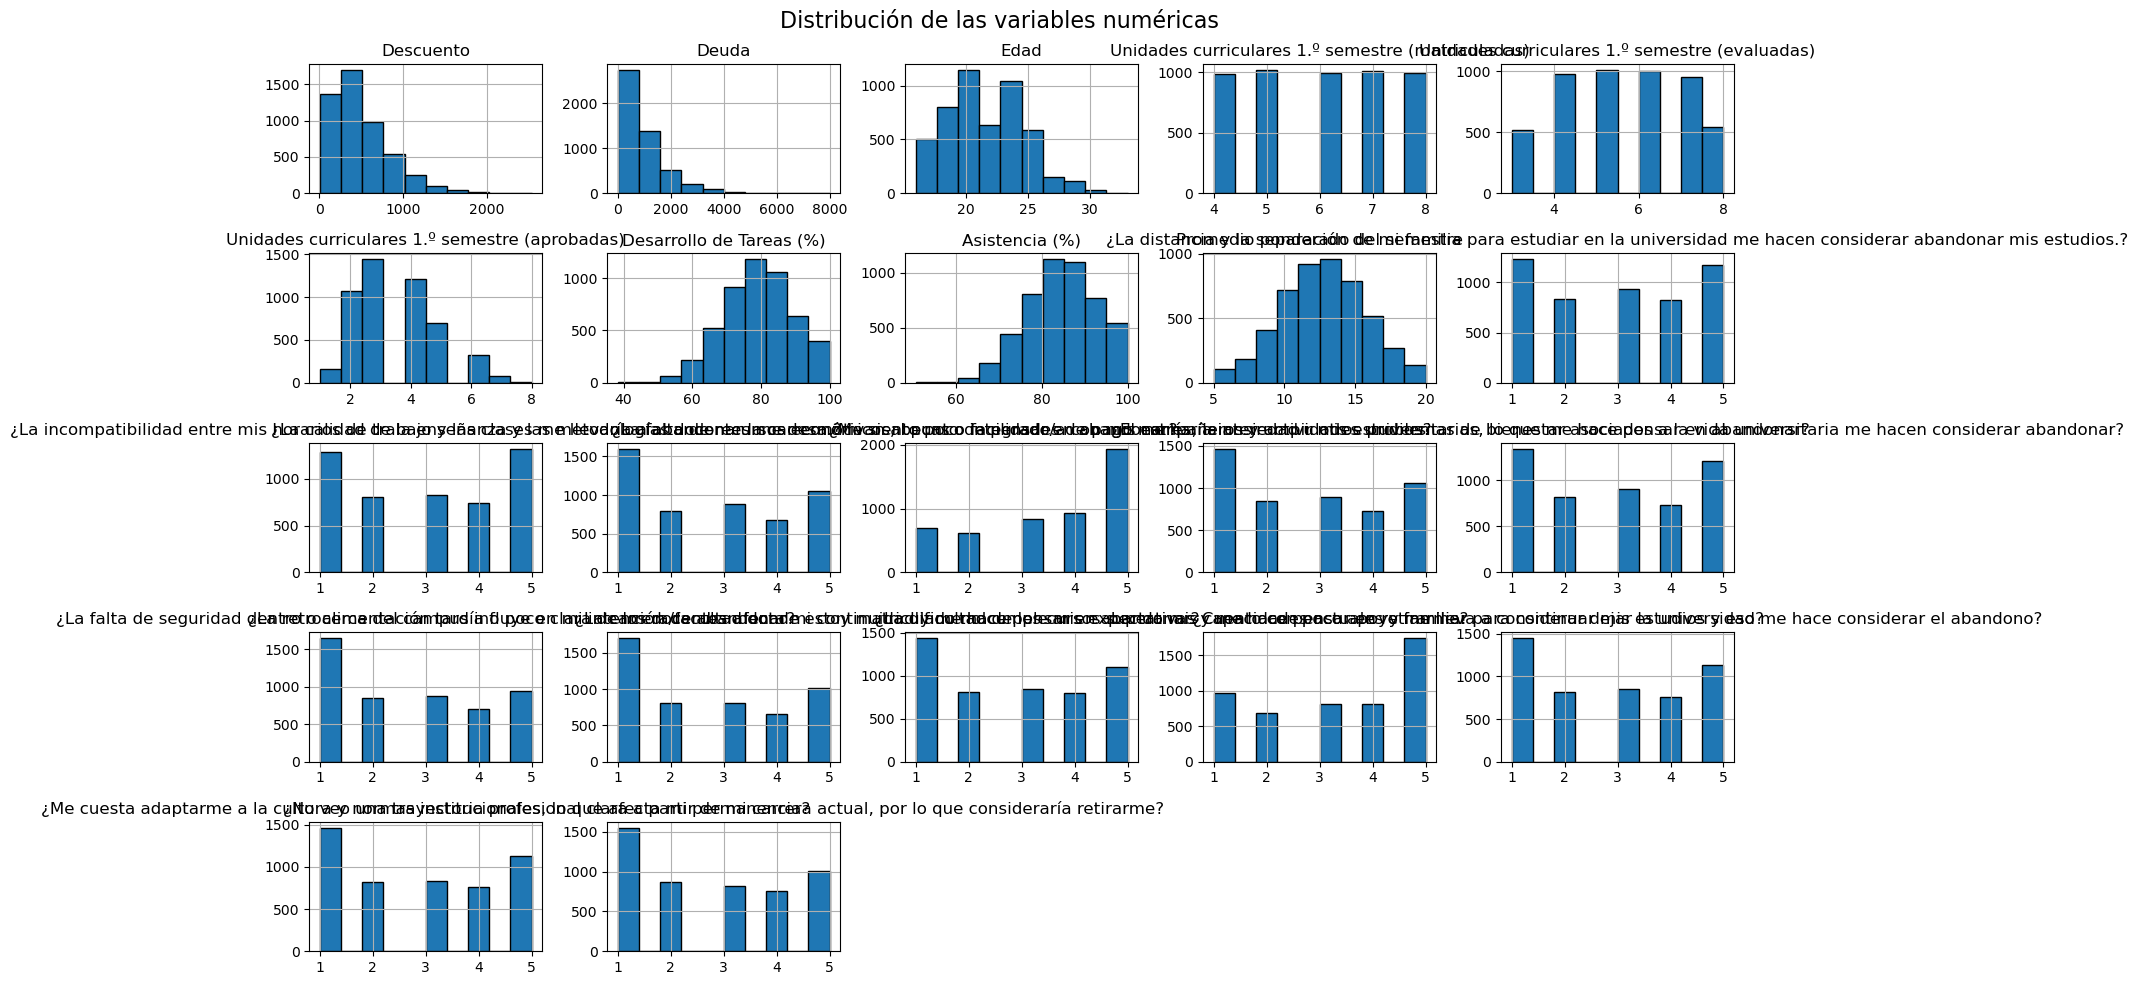

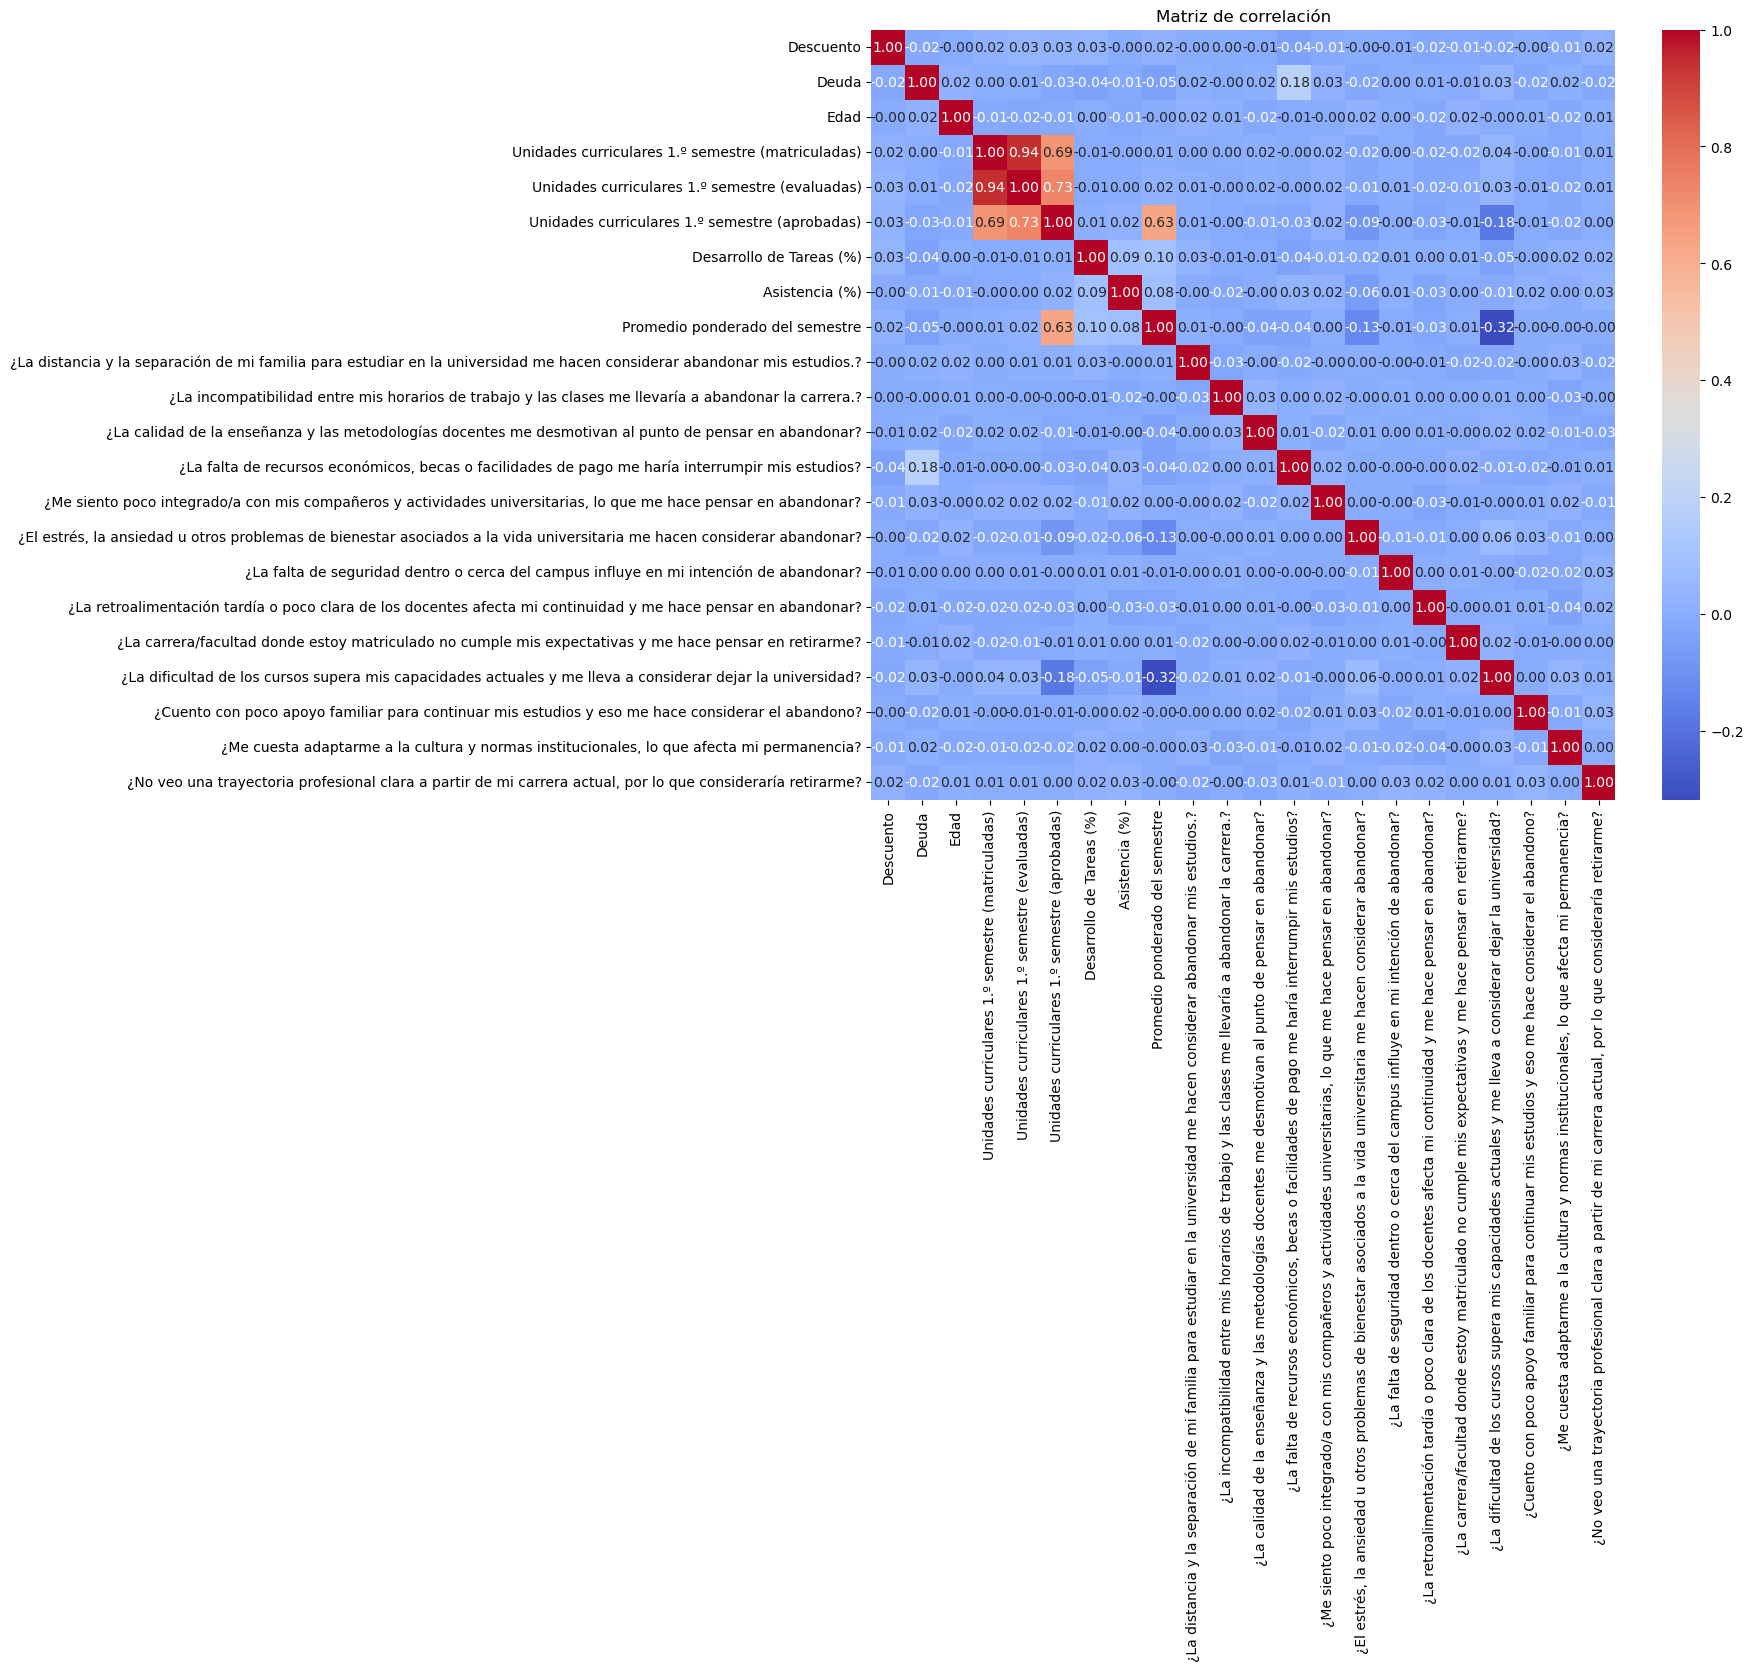

In [11]:
# Histogramas
import matplotlib.pyplot as plt
numeric_data.hist(figsize=(15, 10), bins=10, edgecolor='black')
plt.suptitle("Distribución de las variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()
# Heatmap de correlación
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [12]:

#Antes de realizar PCA, escalamos la data
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy import stats

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)# Escalar los datos numéricos (importante para PCA y K-Means)


In [13]:
pca = PCA()
pca.fit(scaled_data)
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

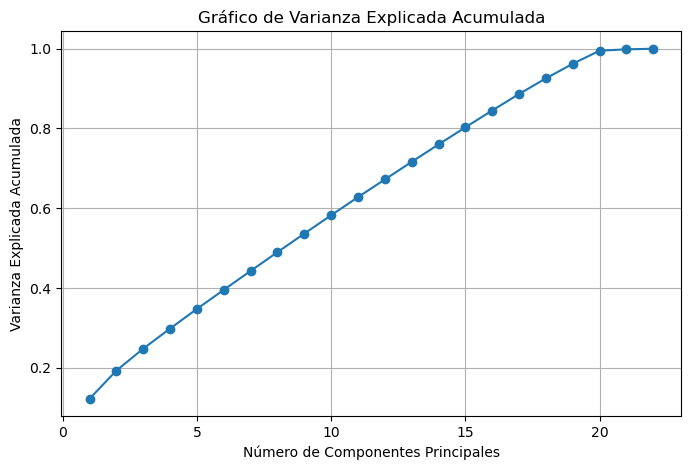

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Gráfico de Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

--- Pruebas de Adecuación para PCA ---
Determinante de la matriz de correlación: 0.006720
KMO general: 0.5326

--- Tabla de Varianza Explicada ---
   Componente  Autovalor  Varianza %  Acumulado %
0          C1       2.69       12.23        12.23
1          C2       1.55        7.06        19.29
2          C3       1.21        5.49        24.78
3          C4       1.11        5.04        29.82
4          C5       1.09        4.93        34.75
5          C6       1.05        4.78        39.53
6          C7       1.04        4.74        44.28
7          C8       1.04        4.71        48.98
8          C9       1.02        4.65        53.63
9         C10       1.01        4.61        58.24
10        C11       1.00        4.54        62.78
11        C12       0.97        4.43        67.21
12        C13       0.97        4.42        71.63
13        C14       0.96        4.36        75.98
14        C15       0.95        4.30        80.28
15        C16       0.93        4.22        84.50
16 

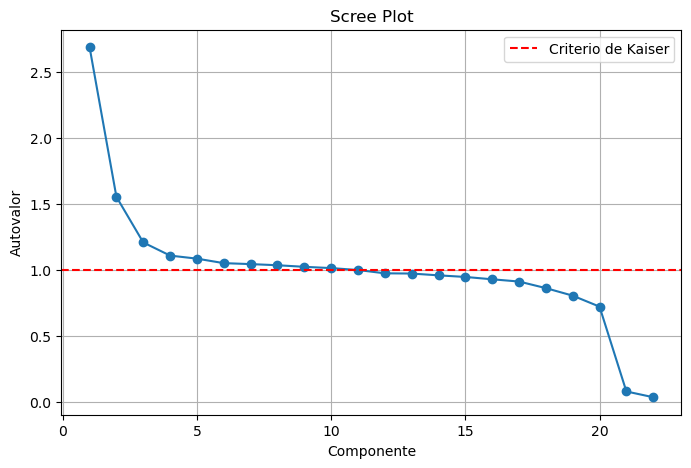

Componentes a retener según el criterio de Kaiser: 10

--- Matriz de Cargas (Loadings) ---
                                                    Componente_1  \
Descuento                                                  0.033   
Deuda                                                     -0.018   
Edad                                                      -0.016   
Unidades curriculares 1.º semestre (matriculadas)          0.542   
Unidades curriculares 1.º semestre (evaluadas)             0.553   
Unidades curriculares 1.º semestre (aprobadas)             0.568   
Desarrollo de Tareas (%)                                   0.021   
Asistencia (%)                                             0.021   
Promedio ponderado del semestre                            0.247   
¿La distancia y la separación de mi familia par...         0.009   
¿La incompatibilidad entre mis horarios de trab...        -0.004   
¿La calidad de la enseñanza y las metodologías ...        -0.001   
¿La falta de recursos eco

In [15]:
# --- Paso 1: Pruebas de Esfericidad y Muestreo (Pre-PCA) ---
# Se utilizan para verificar si los datos son adecuados para PCA
from factor_analyzer.factor_analyzer import calculate_kmo

data_columns = ['Descuento', 'Deuda', 'Edad', 'Unidades curriculares 1.º semestre (matriculadas)',
               'Unidades curriculares 1.º semestre (evaluadas)','Unidades curriculares 1.º semestre (aprobadas)',
                'Desarrollo de Tareas (%)','Asistencia (%)','Promedio ponderado del semestre',
                '¿La distancia y la separación de mi familia para estudiar en la universidad me hacen considerar abandonar mis estudios.?',
                '¿La incompatibilidad entre mis horarios de trabajo y las clases me llevaría a abandonar la carrera.?',
               '¿La calidad de la enseñanza y las metodologías docentes me desmotivan al punto de pensar en abandonar?',
                '¿La falta de recursos económicos, becas o facilidades de pago me haría interrumpir mis estudios?',
                '¿Me siento poco integrado/a con mis compañeros y actividades universitarias, lo que me hace pensar en abandonar?',
                '¿El estrés, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?',
                '¿La falta de seguridad dentro o cerca del campus influye en mi intención de abandonar?',
                '¿La retroalimentación tardía o poco clara de los docentes afecta mi continuidad y me hace pensar en abandonar?',
                '¿La carrera/facultad donde estoy matriculado no cumple mis expectativas y me hace pensar en retirarme?',
               '¿La dificultad de los cursos supera mis capacidades actuales y me lleva a considerar dejar la universidad?',
                '¿Cuento con poco apoyo familiar para continuar mis estudios y eso me hace considerar el abandono?',
                '¿Me cuesta adaptarme a la cultura y normas institucionales, lo que afecta mi permanencia?',
                '¿No veo una trayectoria profesional clara a partir de mi carrera actual, por lo que consideraría retirarme?'] 

print("--- Pruebas de Adecuación para PCA ---")

# Determinante de la matriz de correlación
# Un determinante cercano a 0 indica alta correlación entre variables
correlation_matrix = np.corrcoef(scaled_data.T)
print(f"Determinante de la matriz de correlación: {np.linalg.det(correlation_matrix):.6f}")

# KMO (Kaiser-Meyer-Olkin)
# Un valor > 0.6 es considerado aceptable para aplicar PCA
_, kmo = calculate_kmo(scaled_data)
print(f"KMO general: {kmo:.4f}\n")


# --- Paso 2: Ejecutar PCA completo y analizar resultados ---
pca = PCA()
pca.fit(scaled_data)
autovalores = pca.explained_variance_

# Crear la tabla de varianza explicada
var_exp = pd.DataFrame({
    "Componente": [f"C{i+1}" for i in range(len(autovalores))],
    "Autovalor": autovalores,
    "Varianza %": pca.explained_variance_ratio_ * 100,
    "Acumulado %": np.cumsum(pca.explained_variance_ratio_) * 100
})

print("--- Tabla de Varianza Explicada ---")
print(var_exp.round(2))
print("\n")


# --- Paso 3: Visualizar con el Scree Plot ---
# Muestra cuánta varianza explica cada componente individualmente
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(autovalores) + 1), autovalores, marker='o')
plt.axhline(y=1, color='red', linestyle='--', label='Criterio de Kaiser')
plt.title("Scree Plot")
plt.xlabel("Componente")
plt.ylabel("Autovalor")
plt.legend()
plt.grid(True)
plt.show()


# --- Paso 4: Matriz de Cargas (Loadings) de los componentes ---
# Muestra la relación entre las variables originales y los nuevos componentes
# Se usa el criterio de Kaiser (Autovalor > 1) para decidir cuántos componentes retener
n_retener = sum(autovalores > 1)
print(f"Componentes a retener según el criterio de Kaiser: {n_retener}\n")

cargas = pd.DataFrame(
    pca.components_.T[:, :n_retener],
    columns=[f"Componente_{i+1}" for i in range(n_retener)],
    index=data_columns # Asegúrate de que esta variable tenga los nombres de tus columnas
)

print("--- Matriz de Cargas (Loadings) ---")
print(cargas.round(3))

Resultados:
- Determinante de la matriz de correlación: El determinante es 0.006720, lo que indica que hay una alta correlación entre las variables. Esto es bueno para PCA, ya que PCA funciona mejor cuando las variables están correlacionadas entre sí.
- KMO general: El valor de KMO es 0.5326, lo que está por debajo del umbral recomendado de 0.6. Aunque no es el valor más alto, todavía es aceptable para aplicar PCA, pero sería ideal tener un valor mayor a 0.6 para asegurarse de que las variables sean adecuadas para PCA.

Como se puede ver, solo se quedó con 10 componentes retenidos:

**Los autovalores son:**
- `C1: 2.69`
- `C2: 1.55`
- `C3: 1.21`
- `C4: 1.11`
- `C5: 1.09`
- `C6: 1.05`
- `C7: 1.04`
- `C8: 1.04`
- `C9: 1.02`
- `C10: 1.01`

Esto significa que solo los primeros 10 componentes son los que explican una proporción significativa de la varianza. Además, esto lo verifica el criterio de Kaiser que recomienda retener solo 10 primeros componentes para capturar la mayor parte de la varianza (58.24% de la varianza explicada).

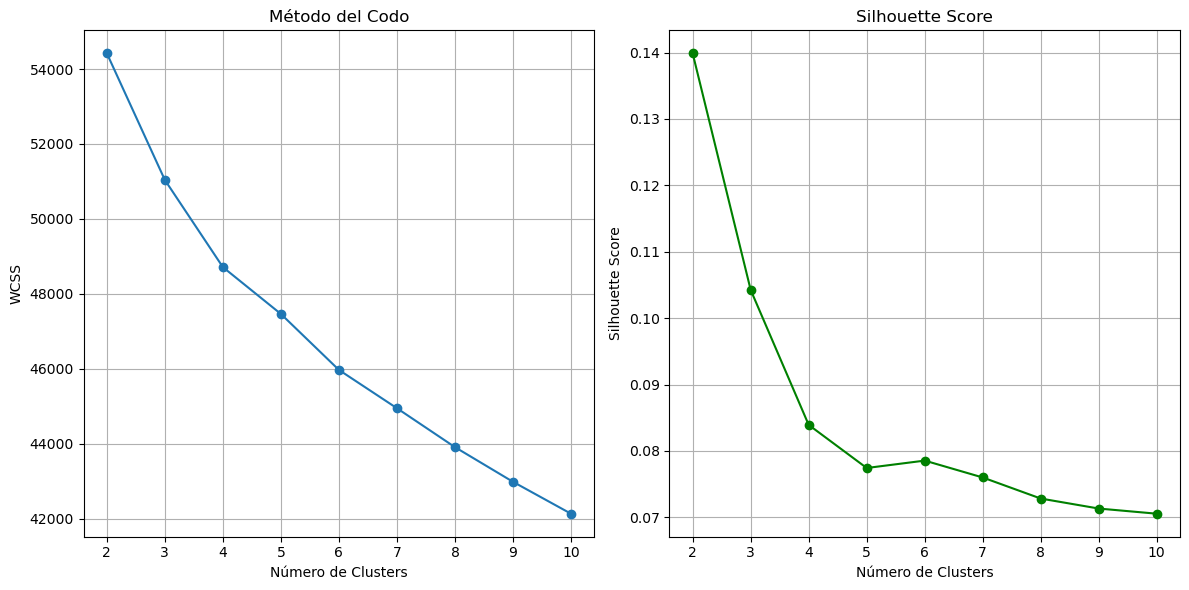

Los datos han sido guardados correctamente: 'data_con_componentes_10.csv' y 'data_con_componentes_10.xlsx'


In [16]:
from sklearn.metrics import silhouette_score

#Seleccionamos la cantidad de componente principales
pca = PCA(n_components=10)
X_pca = pca.fit_transform(scaled_data)

# Usamos los primeros 10 componentes principales (X_pca con 10 componentes)
X_pca_10 = X_pca[:, :10]

# Almacenar WCSS (Suma dentro de los cuadrados de los clusters)
wcss = []
sil_scores = []

# Probar con diferentes valores de k (de 2 a 10)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_10)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_pca_10, kmeans.labels_))

# Graficar el Método del Codo
plt.figure(figsize=(12, 6))

# WCSS
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.grid(True)

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), sil_scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()

#Esto es para guarda data con los componentes principales
# Crear un DataFrame con los primeros 10 componentes principales
df_componentes_10 = pd.DataFrame(X_pca_10, columns=[f"PC{i+1}" for i in range(10)])

# Combinar los componentes principales con los datos originales (data_numeric)
df_completo = numeric_data.copy()  # Copiar tus datos originales
df_completo = pd.concat([df_completo, df_componentes_10], axis=1)  # Agregar los componentes principales

# Guardar el DataFrame con los datos originales y los primeros 10 componentes principales en un archivo CSV o Excel
df_completo.to_csv("data_con_componentes_10.csv", index=False)
df_completo.to_excel("data_con_componentes_10.xlsx", index=False)
print("Los datos han sido guardados correctamente: 'data_con_componentes_10.csv' y 'data_con_componentes_10.xlsx'")

- **Método del codo:** La reducción en WCSS (within-cluster sum of squares) es pronunciada al pasar de 2 clusters a 3 clusters, pero después de eso, la mejora se va estabilizando de manera mucho más gradual. Esto indica que el punto óptimo para el número de clusters según este criterio es 2 o 3.
- **Método de la Silueta:** El Silhouette Score es más alto para 2 clusters, con un valor cercano a 0.14, pero luego disminuye significativamente al aumentar el número de clusters. Esto indica que el modelo con 2 clusters es el que mejor ajusta los datos en términos de calidad de agrupamiento.

### CONCLUSIÓN
Si se prioriza la reducción de la variabilidad (capturando más de los datos), podrías optar por 3 clusters. Si priorizas la calidad del agrupamiento, 2 clusters parecen ser la mejor opción.

Centros de los clusters:
[[ 1.74248466e+00  5.15254491e-01  6.59923933e-02 -4.82852036e-02
  -3.19569828e-02  3.17769978e-02 -1.54457632e-03  1.55617660e-02
   4.17770340e-04  7.27121924e-03]
 [ 2.32012232e-01 -1.35635663e+00 -1.55267645e-01  1.06174221e-01
   8.12784348e-02 -2.13863693e-02 -5.12270320e-02 -4.67734447e-02
   2.99870663e-02  3.23342613e-02]
 [-1.49393469e+00  5.20283370e-01  5.41796949e-02 -3.46246795e-02
  -3.03480102e-02 -9.94904795e-03  3.57705362e-02  1.96352546e-02
  -2.05659223e-02 -2.74103735e-02]]


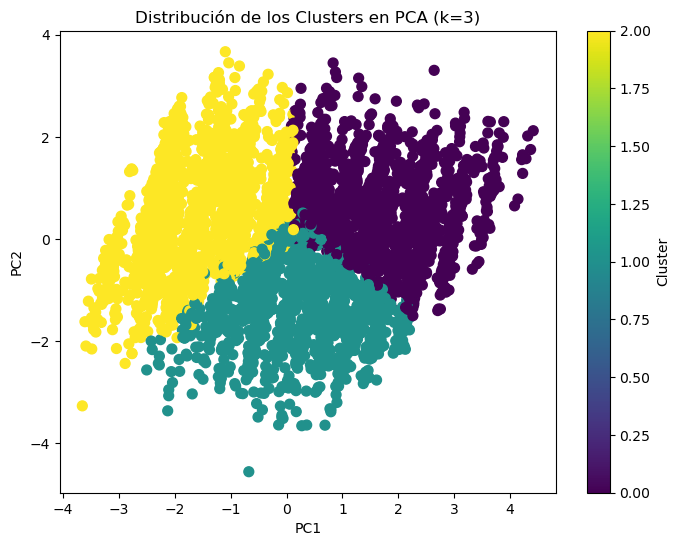

Los datos han sido guardados correctamente: 'data_con_componentes_y_clusters_10.csv'.


In [17]:
# Aplicando K-Means con el número de clusters óptimo
kmeans = KMeans(n_clusters=3, random_state=42)  # clusters según el codo
kmeans.fit(X_pca_10)

# Asignar las etiquetas de los clusters al dataframe
numeric_data["Cluster"] = kmeans.labels_

# Obtener los centros de los clusters
cluster_centers = kmeans.cluster_centers_
print(f"Centros de los clusters:\n{cluster_centers}")

# Visualizar el resultado en el espacio de las dos primeras componentes principales (PCA)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_10[:, 0], X_pca_10[:, 1], c=kmeans.labels_, cmap="viridis", s=50)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Distribución de los Clusters en PCA (k=3)")
plt.colorbar(label="Cluster")
plt.show()


# Esto es para agregar la columna Cluster a la data con las variables y los componentes principales
df_completo["Cluster"] = kmeans.labels_

# Guardar el DataFrame con los datos originales, los primeros 10 componentes y los clusters en un archivo CSV o Excel
df_completo.to_csv("data_con_componentes_y_clusters_10.csv", index=False)
df_completo.to_excel("data_con_componentes_y_clusters_10.xlsx", index=False)

print("Los datos han sido guardados correctamente: 'data_con_componentes_y_clusters_10.csv'.")

In [18]:
# Ahora eliminar la columna 'Cluster' antes de realizar PCA o cualquier análisis posterior
numeric_data_without_cluster = numeric_data.drop(columns=['Cluster'])

# Aplicar PCA con las variables numéricas originales (sin la columna 'Cluster')
pca = PCA(n_components=10)
X_pca_10 = pca.fit_transform(numeric_data_without_cluster)

numeric_data_without_cluster.describe().T

,count,mean,std,min,25%,50%,75%,max
Descuento,5000.0,498.158632,346.624256,5.51,244.1675,415.49,671.2800,2537.31
Deuda,5000.0,960.131896,885.856249,0.87,331.0125,712.79,1291.5225,8000.00
Edad,5000.0,21.595400,3.072065,16.00,19.0000,22.00,24.0000,33.00
Unidades curriculares 1.º semestre (matriculadas),5000.0,5.999200,1.410389,4.00,5.0000,6.00,7.0000,8.00
Unidades curriculares 1.º semestre (evaluadas),5000.0,5.502000,1.513953,3.00,4.0000,5.00,7.0000,8.00
Unidades curriculares 1.º semestre (aprobadas),5000.0,3.511800,1.331546,1.00,3.0000,3.00,4.0000,8.00
Desarrollo de Tareas (%),5000.0,79.186820,10.126950,38.30,72.5000,79.30,86.1250,100.00
Asistencia (%),5000.0,84.553320,8.251159,50.60,79.0000,84.70,90.5000,100.00
Promedio ponderado del semestre,5000.0,12.746932,2.990212,5.00,10.7100,12.76,14.8000,20.00
¿La distancia y la separación de mi familia para estudiar en la universidad me hacen considerar abandonar mis estudios.?,5000.0,2.976800,1.502902,1.00,2.0000,3.00,4.0000,5.00


In [19]:
# Obtener los loadings de PCA
#loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(10)], index=[f'Variable_{i+1}' for i in range(22)])
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(10)], index=numeric_data_without_cluster.columns)


# Mostrar los loadings
print("Loadings de PCA:")
print(loadings)

# Crear un dataframe con los centros de los clusters para los 10 componentes principales
centros_clusters = pd.DataFrame(kmeans.cluster_centers_, columns=[f'PC{i+1}' for i in range(10)])

# Mostrar los centros de los clusters
print("Centros de los Clústeres:")
print(centros_clusters)



Loadings de PCA:
                                                             PC1  \
Descuento                                          -8.751949e-03   
Deuda                                               9.999615e-01   
Edad                                                7.866421e-05   
Unidades curriculares 1.º semestre (matriculadas)   2.098471e-06   
Unidades curriculares 1.º semestre (evaluadas)      8.692275e-06   
Unidades curriculares 1.º semestre (aprobadas)     -3.914415e-05   
Desarrollo de Tareas (%)                           -5.092475e-04   
Asistencia (%)                                     -1.181094e-04   
Promedio ponderado del semestre                    -1.692059e-04   
¿La distancia y la separación de mi familia par...  2.686871e-05   
¿La incompatibilidad entre mis horarios de trab... -1.534307e-06   
¿La calidad de la enseñanza y las metodologías ...  2.838674e-05   
¿La falta de recursos económicos, becas o facil...  2.962740e-04   
¿Me siento poco integrado/a con

### RELACIÓN ENTRE LAS VARIABLES Y LOS COMPONENTES PRINCIPALES

In [20]:
tabla_componentes_variables = pd.DataFrame({
    "Variable": [
        "Descuento",
        "Deuda",
        "Edad",
        "Unidades curriculares 1.º semestre (matriculadas)",
        "Unidades curriculares 1.º semestre (evaluadas)",
        "Unidades curriculares 1.º semestre (aprobadas)",
        "Desarrollo de Tareas (%)",
        "Asistencia (%)",
        "Promedio ponderado del semestre",
        "¿La distancia y la separación de mi familia para estudiar en la universidad me hacen considerar abandonar mis estudios?",
        "¿La incompatibilidad entre mis horarios de trabajo y las clases me llevaría a abandonar la carrera?",
        "¿La calidad de la enseñanza y las metodologías docentes me desmotivan al punto de pensar en abandonar?",
        "¿La falta de recursos económicos, becas o facilidades de pago me haría interrumpir mis estudios?",
        "¿Me siento poco integrado/a con mis compañeros y actividades universitarias, lo que me hace pensar en abandonar?",
        "¿El estrés, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?",
        "¿La falta de seguridad dentro o cerca del campus influye en mi intención de abandonar?",
        "¿La retroalimentación tardía o poco clara de los docentes afecta mi continuidad y me hace pensar en abandonar?",
        "¿La carrera/facultad donde estoy matriculado no cumple mis expectativas y me hace pensar en retirarme?",
        "¿La dificultad de los cursos supera mis capacidades actuales y me lleva a considerar dejar la universidad?",
        "¿Cuento con poco apoyo familiar para continuar mis estudios y eso me hace considerar el abandono?",
        "¿Me cuesta adaptarme a la cultura y normas institucionales, lo que afecta mi permanencia?",
        "¿No veo una trayectoria profesional clara a partir de mi carrera actual, por lo que consideraría retirarme?",
    ],
    "C.P. Asignado": [
        "PC2",
        "PC1",
        "PC6",
        "PC7",
        "PC7",
        "PC5",
        "PC3",
        "PC4",
        "PC5",
        "PC8",
        "PC9",
        "PC9",
        "PC10",
        "PC9",
        "PC10",
        "PC10",
        "PC9",
        "PC10",
        "PC7",
        "PC10",
        "PC8",
        "PC9"
    ],
    "Loading Dominante (Magnitud)": [
        "0.9999612",
        "0.9999615",
        "0.997069",
        "0.606741",
        "0.658841",
        "0.316347",
        "0.979615",
        "0.979610",
        "0.915534",
        "0.2574999",
        "0.582574",
        "0.333722",
        "0.082521",
        "0.348061",
        "0.406256",
        "0.322043",
        "0.506613",
        "0.285277",
        "0.185220",
        "0.744979",
        "0.5863753",
        "0.352976",
    ],
})

# Mostrar la tabla como DataFrame
display(tabla_componentes_variables)

,Variable,C.P. Asignado,Loading Dominante (Magnitud)
0,Descuento,PC2,0.9999612
1,Deuda,PC1,0.9999615
2,Edad,PC6,0.997069
3,Unidades curriculares 1.º semestre (matriculadas),PC7,0.606741
4,Unidades curriculares 1.º semestre (evaluadas),PC7,0.658841
5,Unidades curriculares 1.º semestre (aprobadas),PC5,0.316347
6,Desarrollo de Tareas (%),PC3,0.979615
7,Asistencia (%),PC4,0.979610
8,Promedio ponderado del semestre,PC5,0.915534
9,¿La distancia y la separación de mi familia pa...,PC8,0.2574999


### INTERPRETACIÓN DE LOS COMPONENTES PRINCIPALES
**1. PC1: Deuda Financiera 💰**

- Variables con carga alta: Deuda (0.999) y Descuento (0.008).

- Interpretación: Este componente está casi completamente dominado por la variable Deuda. Representa la dimensión económica de los estudiantes, específicamente el peso de sus obligaciones financieras, independientemente de si tienen un descuento. Un valor alto en PC1 sugiere un alto nivel de deuda, mientras que un valor bajo indica una deuda menor.

**2. PC2: Beneficios y Apoyo Financiero (Descuento) 💸**

- Variables con carga alta: Descuento (0.999) y Deuda (0.008).

- Interpretación: Similar al PC1, este componente se centra en el aspecto económico. Sin embargo, su carga principal es el Descuento, lo que sugiere que este componente describe a estudiantes que reciben algún tipo de beneficio financiero.

**3. PC3: Rendimiento en Tareas y Asistencia ✍️**

- Variables con carga alta: Desarrollo de Tareas (%) (0.979) y Asistencia (%) (0.197).

- Interpretación: Este componente se relaciona con la participación y el esfuerzo académico del estudiante, principalmente medido por el porcentaje de tareas completadas. También tiene una conexión positiva, aunque más débil, con la asistencia a clases. Un alto valor en este componente significa que el estudiante es diligente con sus tareas y asiste a clases.

**4. PC4: Asistencia y Compromiso 🏃‍♂️**

- Variables con carga alta: Asistencia (%) (0.979) y Desarrollo de Tareas (%) (-0.198).

- Interpretación: Este componente está fuertemente definido por la asistencia a clases. La carga negativa con Desarrollo de Tareas (%) es interesante, aunque no tan fuerte como para sugerir una relación inversa significativa. En general, este PC representa el nivel de compromiso del estudiante medido por su asistencia.

**5. PC5: Éxito Académico General 🎓**

- Variables con carga alta: Promedio ponderado del semestre (0.915) y Unidades curriculares 1.º semestre (aprobadas) (0.316).

- Interpretación: Este componente es un claro indicador del éxito académico del estudiante. Combina la calificación promedio y el número de cursos aprobados en el primer semestre, proporcionando una medida holística del rendimiento académico.

**6. PC6: Edad y Madurez del Estudiante 🧑‍🦳**

- Variables con carga alta: Edad (0.997).

- Interpretación: Este componente está casi exclusivamente determinado por la Edad del estudiante. Representa una dimensión de madurez o demografía, diferenciando a los estudiantes más jóvenes de los de mayor edad, lo que podría estar relacionado con diferentes etapas de vida o contextos.

**7. PC7: Carga Académica (matriculadas/evaluadas/aprobadas) ↑ = más cursos gestionados.📚**

- Variables con carga alta: Unidades curriculares 1.º semestre (evaluadas) (0.658), Unidades curriculares 1.º semestre (matriculadas) (0.606) y Unidades curriculares 1.º semestre (aprobadas) (0.367).

- Interpretación: Este componente agrupa variables que miden la carga académica del estudiante, como el número de unidades matriculadas, evaluadas y aprobadas. Describe a los estudiantes en función de la cantidad de cursos que manejan.

**8. PC8: Adaptación e Integración Social 🤗**

- Variables con carga alta: ¿Me cuesta adaptarme a la cultura y normas institucionales? (0.586), ¿La incompatibilidad entre mis horarios de trabajo y estudio? (-0.468), ¿La retroalimentación tardía o poco clara de los docentes? (-0.420), ¿La distancia y la separación de mi familia? (0.257)

- Interpretación: Este componente es más complejo. Las altas cargas positivas en adaptación y distancia familiar sugieren que este componente está relacionado con desafíos personales de adaptación y la nostalgia por el hogar. Las cargas negativas en incompatibilidad de horarios y retroalimentación podrían indicar que estos estudiantes no experimentan esos problemas, lo que podría significar que no trabajan o tienen una mejor comunicación con sus docentes.

**9. PC9: Dificultades con el Entorno Académico y Social 😔**

- Variables con carga alta: ¿La incompatibilidad entre mis horarios de trabajo y estudio? (0.582), ¿Me siento poco integrado/a con mis compañeros? (0.348), ¿La calidad de la enseñanza y las metodologías de los docentes? (0.333), ¿La retroalimentación tardía o poco clara de los docentes? (-0.506).

- Interpretación: Este componente describe las dificultades relacionadas con el entorno académico y social. Un alto valor sugiere problemas con los horarios, la integración social y la calidad de la enseñanza. Curiosamente, la carga negativa en retroalimentación sugiere que los estudiantes con estos problemas no perciben un problema significativo con la retroalimentación de los docentes.

**10. PC10: Apoyo Familiar y Bienestar Emocional 🫂**

- Variables con carga alta: ¿Cuento con poco apoyo familiar para continuar mis estudios? (0.744) y ¿El estrés, la ansiedad u otros problemas de bienestar? (0.406).

- Interpretación: Este componente está claramente relacionado con el bienestar emocional y el apoyo familiar. Un alto valor indica que el estudiante se siente falto de apoyo familiar y experimenta altos niveles de estrés y ansiedad.

### INTERPRETACIÓN DE LOS CLUSTERS

**Cluster 1 (0): Deuda alta con beca, desempeño medio**
- Tag: Deuda↑·Beca↑·Rendimiento↘
- Por qué: Alta deuda y descuento (PC1↑, PC2↑), tareas levemente ↑ pero asistencia ↘ y
- GPA ↘; ligera dificultad de adaptación y estrés moderado.

Perfil:

- Muy alta deuda (PC1↑) y sí recibe descuento (PC2↑).

- Tareas ligeramente por encima del promedio (PC3↗); asistencia algo por debajo (PC4↘).

- Rendimiento/GPA algo por debajo (PC5↘).

- Edad un poco mayor (PC6↗ leve). Carga académica neutra (PC7≈0).

- Adaptación algo difícil (PC8↗ leve), dificultades de entorno neutras (PC9≈0), estrés/apoyo familiar moderado (PC10↗ leve).
Resumen: Económicamente tensionados pero con beca/beneficio; rendimiento medio–bajo; hacen tareas, asisten algo menos; ligera dificultad de adaptación; estrés moderado

**Cluster 2 (1): Alto rendimiento, alto estrés (sin beca)**
- Tag: Rendimiento↑·Estrés↑·Beca↓
- Por qué: Mejor GPA (PC5↑) y asistencia ↑↑, pero tareas ↓↓, descuento ↓↓, estrés/apoyo familiar desfavorable (PC10↑↑) y más problemas de entorno (PC9↑).

Perfil:

- Deuda media (PC1≈) y casi sin descuento (PC2↓↓).

- Pocas tareas (PC3↓↓) pero muy buena asistencia (PC4↑↑).

- Mejor rendimiento/GPA del conjunto (PC5↑).

- Un poco más jóvenes (PC6↘) y baja carga académica (PC7↓↓).

- Mejor adaptación institucional (PC8↓↓), más problemas de entorno (horarios/integración/enseñanza) (PC9↑).

- Alto estrés y poco apoyo familiar (PC10↑↑).
Resumen: Académicamente fuertes (buen GPA) con alta asistencia, pero entregan menos tareas; sin beca; baja carga de cursos; buen encaje institucional, aunque reportan problemas de entorno; estrés alto y poco apoyo familiar.


**Cluster 3 (2): Alta carga con beca, baja adaptación**
- Tag: Carga↑·Beca↑·Adaptación↓
- Por qué: Baja deuda y con descuento (PC1↓↓, PC2↑), carga académica ↑ (PC7↑) pero GPA ↓↓, asistencia ↘, adaptación institucional difícil (PC8↑) y estrés bajo / buen apoyo (PC10↓).

Perfil
- Baja deuda (PC1↓↓) y sí recibe descuento (PC2↑).

- Tareas algo por encima (PC3↗); asistencia algo por debajo (PC4↘).

- Rendimiento/GPA más bajo (PC5↓↓).

- Edad ligeramente menor (PC6↘). Mayor carga académica (PC7↑).

- Más dificultad de adaptación institucional (PC8↑), menos problemas de entorno (PC9↓), menos estrés y mejor apoyo familiar (PC10↓).
Resumen: Muchos cursos y beca; poca deuda; rendimiento bajo; hacen tareas pero asisten algo menos; les cuesta la adaptación institucional; menos problemas de horarios/enseñanza; estrés bajo con buen apoyo familiar.

In [21]:

tabla_componentes = pd.DataFrame({
    "Componente (significado)": [
        "PC1 – Deuda",
        "PC2 – Descuento/beneficio",
        "PC3 – Tareas (± asistencia)",
        "PC4 – Asistencia",
        "PC5 – Éxito (GPA + aprobadas)",
        "PC6 – Edad",
        "PC7 – Carga académica",
        "PC8 – Adaptación institucional",
        "PC9 – Dificultades de entorno",
        "PC10 – Apoyo familiar & estrés",
    ],
    "Cluster 0": [
        "Alta",
        "Alta",
        "Ligeramente alta",
        "Baja",
        "Bajo",
        "Ligeramente mayor",
        "Neutra",
        "Ligeramente difícil",
        "Neutras",
        "Moderado (algo de estrés, apoyo algo menor)",
    ],
    "Cluster 1": [
        "Media",
        "Baja",
        "Baja",
        "Alta",
        "Alto",
        "Ligeramente menor",
        "Baja",
        "Favorable",
        "Altas",
        "Alto estrés / poco apoyo",
    ],
    "Cluster 2": [
        "Baja",
        "Alta",
        "Ligeramente alta",
        "Baja",
        "Bajo",
        "Ligeramente menor",
        "Alta",
        "Difícil",
        "Bajas",
        "Bajo estrés / buen apoyo",
    ],
})

# Mostrar la tabla como DataFrame
display(tabla_componentes)

# (Opcional) Mostrar como Markdown bonito en la salida
try:
    from tabulate import tabulate
    print(tabulate(tabla_componentes, headers="keys", tablefmt="github", showindex=False))
except ImportError:
    # Si no tienes 'tabulate' instalado, puedes usar to_markdown de pandas (pandas >= 1.0)
    try:
        print(tabla_componentes.to_markdown(index=False))
    except Exception:
        print(tabla_componentes)


,Componente (significado),Cluster 0,Cluster 1,Cluster 2
0,PC1 – Deuda,Alta,Media,Baja
1,PC2 – Descuento/beneficio,Alta,Baja,Alta
2,PC3 – Tareas (± asistencia),Ligeramente alta,Baja,Ligeramente alta
3,PC4 – Asistencia,Baja,Alta,Baja
4,PC5 – Éxito (GPA + aprobadas),Bajo,Alto,Bajo
5,PC6 – Edad,Ligeramente mayor,Ligeramente menor,Ligeramente menor
6,PC7 – Carga académica,Neutra,Baja,Alta
7,PC8 – Adaptación institucional,Ligeramente difícil,Favorable,Difícil
8,PC9 – Dificultades de entorno,Neutras,Altas,Bajas
9,PC10 – Apoyo familiar & estrés,"Moderado (algo de estrés, apoyo algo menor)",Alto estrés / poco apoyo,Bajo estrés / buen apoyo


| Componente (significado)       | Cluster 0                                   | Cluster 1                | Cluster 2                |
|--------------------------------|---------------------------------------------|--------------------------|--------------------------|
| PC1 – Deuda                    | Alta                                        | Media                    | Baja                     |
| PC2 – Descuento/beneficio      | Alta                                        | Baja                     | Alta                     |
| PC3 – Tareas (± asistencia)    | Ligeramente alta                            | Baja                     | Ligeramente alta         |
| PC4 – Asistencia               | Baja                                        | Alta                     | Baja                     |
| PC5 – Éxito (GPA + aprobadas)  | Bajo                                        | Alto                     | Bajo                     |
| PC6 – Edad                     | Ligeramente mayor   

In [22]:
# Realizar ANOVA para comparar las variables numéricas entre los clusters
# Añadir etiquetas de cluster a los datos
numeric_data_with_clusters = numeric_data.copy()
numeric_data_with_clusters['Cluster'] = kmeans.labels_

# Realizar ANOVA para cada variable numérica
anova_results = {}
for col in numeric_data.columns:
    f_val, p_val = stats.f_oneway(*(numeric_data_with_clusters[numeric_data_with_clusters['Cluster'] == i][col] for i in range(kmeans.n_clusters)))
    anova_results[col] = {'F-valor': f_val, 'P-valor': p_val}

# Crear una tabla ANOVA
anova_table = pd.DataFrame(anova_results).T
print("Tabla ANOVA:")
print(anova_table)

Tabla ANOVA:
                                                        F-valor        P-valor
Descuento                                              5.733010   3.258649e-03
Deuda                                                 10.829409   2.027732e-05
Edad                                                   0.055160   9.463342e-01
Unidades curriculares 1.º semestre (matriculadas)   5637.723012   0.000000e+00
Unidades curriculares 1.º semestre (evaluadas)      5146.892200   0.000000e+00
Unidades curriculares 1.º semestre (aprobadas)      3999.579130   0.000000e+00
Desarrollo de Tareas (%)                              27.159852   1.854710e-12
Asistencia (%)                                        34.246385   1.690412e-15
Promedio ponderado del semestre                     1315.801259   0.000000e+00
¿La distancia y la separación de mi familia par...     3.400770   3.342479e-02
¿La incompatibilidad entre mis horarios de trab...     0.285845   7.513916e-01
¿La calidad de la enseñanza y las metod

/opt/conda/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


# Interpretación de los resultados de ANOVA

### Interpretación de los Resultados del ANOVA

Esta tabla resume cómo cada variable se diferencia entre los clústeres, basándose en el valor F y el valor P del ANOVA.

| Variable | F-Valor | P-Valor | Interpretación |
| :--- | :--- | :--- | :--- |
| **Unidades curriculares 1.º semestre (matriculadas)** | 5637.72 | 0.000 | **Diferencia muy alta**. La cantidad de cursos matriculados es el factor más importante que distingue a los clústeres. |
| **Unidades curriculares 1.º semestre (evaluadas)** | 5146.89 | 0.000 | **Diferencia muy alta**. La cantidad de cursos evaluados es un factor clave de diferenciación. |
| **Unidades curriculares 1.º semestre (aprobadas)** | 3999.58 | 0.000 | **Diferencia muy alta**. La cantidad de cursos aprobados distingue fuertemente a los grupos. |
| **Promedio ponderado del semestre** | 1315.80 | 0.000 | **Diferencia muy alta**. El rendimiento académico general es un factor crítico de distinción. |
| **Dificultad de los cursos supera mis capacid...** | 629.18 | 1.95e-244 | **Diferencia muy alta**. La percepción de la dificultad de los cursos es un factor clave. |
| **El estrés, la ansiedad u otros problemas de bi...** | 91.32 | 1.11e-39 | **Diferencia muy alta**. El bienestar emocional es una de las variables más fuertes que diferencia a los clústeres. |
| **Asistencia (%)** | 34.25 | 1.69e-15 | **Diferencia alta**. La asistencia a clases es un factor crucial en la formación de los clústeres. |
| **Desarrollo de Tareas (%)** | 27.16 | 1.85e-12 | **Diferencia alta**. El nivel de cumplimiento de tareas distingue significativamente a los estudiantes. |
| **Deuda** | 10.83 | 2.03e-05 | **Diferencia moderada-alta**. La carga de deuda es un factor importante para diferenciar a los clústeres. |
| **La calidad de la enseñanza y las metodologías...** | 10.79 | 2.12e-05 | **Diferencia moderada-alta**. La opinión sobre la calidad de la enseñanza difiere notablemente entre los clústeres. |
| **La retroalimentación tardía o poco clara de lo...** | 4.88 | 7.60e-03 | **Diferencia moderada**. La percepción sobre la retroalimentación de los docentes es un factor diferenciador. |
| **¿No veo una trayectoria profesional clara a par...** | 5.09 | 6.16e-03 | **Diferencia moderada**. La claridad sobre la carrera profesional futura es un factor que ayuda a distinguir a los grupos. |
| **Descuento** | 5.73 | 3.26e-03 | **Diferencia moderada**. El acceso a descuentos financieros es un factor significativo para diferenciar a los clústeres. |
| **La falta de recursos económicos, becas o facil...** | 5.38 | 4.65e-03 | **Diferencia moderada**. La percepción de falta de recursos financieros ayuda a distinguir a los grupos. |
| **¿La distancia y la separación de mi familia par...** | 3.40 | 3.34e-02 | **Diferencia moderada-baja**. El impacto de la separación familiar es un factor que ayuda a diferenciar a los clústeres. |
| **¿Me cuesta adaptarme a la cultura y normas inst...** | 2.51 | 8.17e-02 | **Sin diferencia significativa**. Las diferencias no son estadísticamente significativas. |
| **¿La falta de seguridad dentro o cerca del campu...**| 2.25 | 0.106 | **Sin diferencia significativa**. No hay diferencias significativas entre los grupos. |
| **¿La carrera/facultad donde estoy matriculado no...** | 1.64 | 0.194 | **Sin diferencia significativa**. La elección de carrera no es un factor de distinción. |
| **¿Me siento poco integrado/a con mis compañeros...** | 1.27 | 0.281 | **Sin diferencia significativa**. El sentimiento de integración social no es un factor que diferencie a los clústeres. |
| **¿Cuento con poco apoyo familiar para continuar...** | 1.14 | 0.319 | **Sin diferencia significativa**. La percepción de falta de apoyo familiar no es un factor distintivo. |
| **¿La incompatibilidad entre mis horarios de trab...** | 0.29 | 0.751 | **Sin diferencia significativa**. La incompatibilidad de horarios no es un factor que distinga a los clústeres. |
| **Edad** | 0.06 | 0.946 | **Sin diferencia significativa**. No hay diferencias en la edad entre los clústeres. |

### **Conclusiones:**
El análisis de clústeres, complementado por el ANOVA, revela que los grupos de estudiantes no se diferencian solo por su situación financiera. La separación en los clústeres se basa en un conjunto de factores multifacéticos que abarcan lo académico, lo financiero y el bienestar emocional.

Los factores con mayor peso en la distinción entre los grupos son:
- Rendimiento y Compromiso Académico: Variables como el promedio, el número de cursos aprobados, el desarrollo de tareas y la asistencia son los principales impulsores de la segmentación. Esto sugiere que los clústeres se formaron principalmente en torno a los niveles de rendimiento y esfuerzo de los estudiantes.
- Bienestar Emocional y Percepción de Dificultad: El estrés, la ansiedad y la percepción de la dificultad de los cursos también son factores muy importantes que diferencian a los grupos. Esto indica que la experiencia emocional y cognitiva de los estudiantes juega un papel crucial en su perfil.
- Situación Financiera: Aunque no son los únicos, la deuda, los descuentos y la percepción de falta de recursos económicos son factores significativos que diferencian a los clústeres.
"""